# **Classify heart disease using patients' maximum heart rate during strenuous exercise, and ST depression induced by exercise**
#### *An Phung, Bruce Zhang, Hellen Zhu, Wei Cao*

## **Introduction**

Heart disease (cardiovascular disease) encompasses various conditions affecting the heart and blood vessels, often leading to heart attacks due to arterial blockages (K.Srinivas et al., 2010). Early identification and treatment are crucial to prevent severe complications.

The Heart Attack dataset used provides 13 variables that are possibly linked to heart disease, with whether or not they developed the disease. This study aims uses the K-nearest neighbors (KNN) algorithm to predict heart disease likelihood, focusing on maximum heart rate, and exercise-induced ST depression

Low maximum heart rate and ST depression are early heart disease symptoms. Reduced maximum heart rate indicates lower cardiovascular fitness (Kostis et al., 1982), while ST depression on an electrocardiogram signals potential issues like myocardial ischemia (Kligfield et al., 1989).

Thus, the question being addressed is: ***Can heart disease be accurately predicted based on a patient’s maximum heart rate during strenuous exercise and ST depression induced by exercise?***

## **Preprocessing & Preliminary exploratory data analysis**

### *Importing libraries & dataset*

In [48]:
#Importing the libraries required to perform the analysis and setting the seed 
library(tidyverse)
library(tidymodels)
library(repr)
set.seed(1)

In [40]:
#loading Heart attack data set 
heart_data <- read_csv("Heart Attack Data Set.csv")
heart_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1


### *Cleaning the dataset*

To clean the dataset, we need to select the variables required to perform further analysis and assign apporpriate data types to each variable. Furthermore, the factors in target is changed from "0/1" to "positive/negative" to more clearly communicate that the classes represent positive or negative diagnosis. 

In [9]:
#selecting the variables needed to perform the analysis 
heart_clean_data <- heart_data |>
        select(target, thalach, oldpeak) |>
        #Assigning apporpriate data types 
        mutate(target = as_factor(target))|>  
        #Change target to factor POSITIVE/NEGATIVE
         mutate(target = fct_recode(target, "Positive" = "1", "Negative" = "0"))
heart_clean_data      

target,thalach,oldpeak
<fct>,<dbl>,<dbl>
Positive,150,2.3
Positive,187,3.5
Positive,172,1.4
Positive,178,0.8
Positive,163,0.6
Positive,148,0.4
Positive,153,1.3
Positive,173,0.0
Positive,162,0.5


### *Splitting the dataset*

The dataset is split into 75% training set and 25% testing set to create an reliable training model while maintaining an accurate evaluation of its performance with the testing set. 

In [10]:
#Splitting data frame into 75% training set, 25% testing set
heart_split <- initial_split(heart_clean_data, prop = 0.75, strata = target)

heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

### *Summarizing data*

In order to analyze the correlation between the predictors and the classes, we start by finding the mean of each predictor for the two classes. In addition, using the  `summarize` function, the number of observations in each class was obtained to check for class imbalances. The number of missing rows were also obtained to account for any missing data

In [11]:
#Exploratory data analysis with training data 
heart_ana <- heart_training |>
             group_by(target) |>
             summarize(n_of_obs = n(),
                       mean_thalach = mean(thalach),
                       mean_oldpeak= mean(oldpeak),
                       missing_rows= sum(is.na(heart_training)))

heart_ana

target,n_of_obs,mean_thalach,mean_oldpeak,missing_rows
<fct>,<int>,<dbl>,<dbl>,<int>
Negative,103,139.9417,1.5825243,0
Positive,123,155.9756,0.6455285,0


From the summary above, we see that patients who have a positive diagnosis for heart disease generally has a lower ST depression value and a higher maximum heart rate value compared to patients who have a negative diagnosis. The number of observations for positive and negative diagnosis is fairly even with the positive diagnosis being slightly higher, indicating that there is no problem of significant class imbalance. In addition, the summary suggests that there is no missing data in this dataset as the number of missing rows for both classes is 0. 

### *Visualizing the realtionship between Predictors and Class*

A scatter plot of Max heart rate vs. ST depression is plotted to further analyze the relationship between the two predictors and the classes we are predicting  

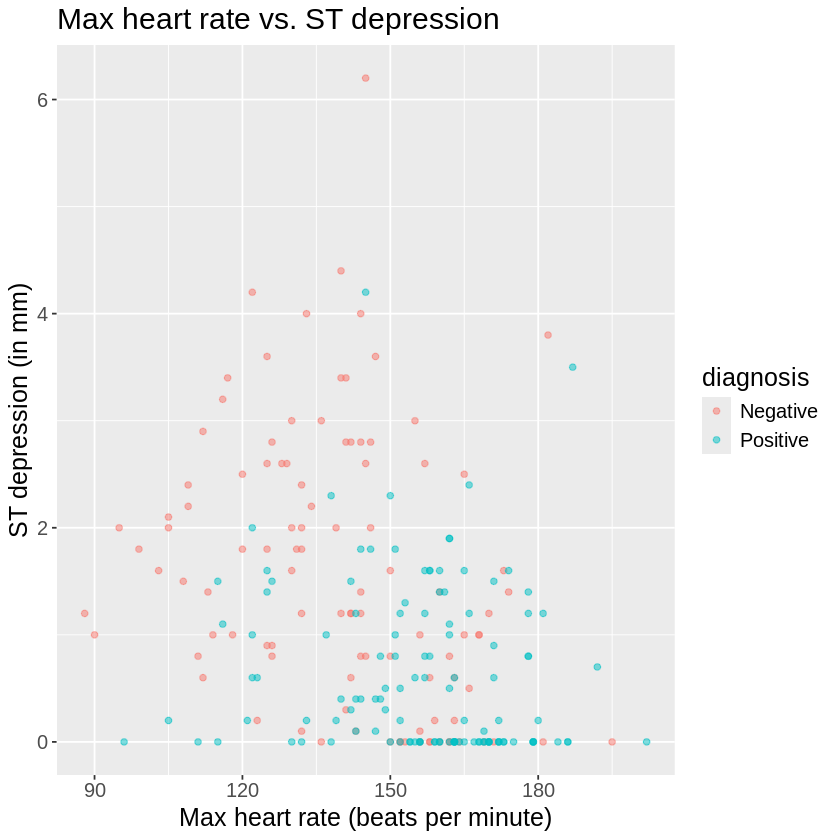

In [12]:
#Plotting the training data as a scatter plot 
heart_plot <- ggplot(heart_training, aes(x = thalach, y = oldpeak, color = target)) +
            geom_point(alpha = 0.5) +
            labs(x = "Max heart rate (beats per minute)", y = "ST depression (in mm)", color = "diagnosis", title = "Max heart rate vs. ST depression") +
            theme(text = element_text(size = 15))
heart_plot

Analyzing the visualization above, we can see that the positive and negative class has a distinct grouping with both predictors showing clear trends; The negative diagnosis concentrated on the top left and the positive diagnosis concentrated on bottom right. This affirms the suitability of using ST depression and Max heart rate as predictors when building the classification model for this dataset. 
The results shown in the visualization also align with what was analyzed in the data summary: patients with a positive diagnosis tend to have a lower ST depression value and higher maximum heart rate. 

## **Building a Model**

### *Finding the best $k$ value*

**Creating model**

To create a model for finding the best k value, we: 

1. Set seed to 1 to get the same fold each time.
2. create a recipe for training data and center and scale all predictors.
3. build a specification using k-nearest neighbours and setting `neighbors = tune`.
4. split the data into 5 equal chunks using `vfold_cv`.
5. repeat each validation for k values from 1 to 10.

In [38]:
set.seed(1)

#preprocesssing the data 
Heart_recipe <- recipe(target ~ thalach + oldpeak, data = heart_training) |>
        step_scale(all_predictors()) |>
        step_center(all_predictors())

#Tunning the model 
Heart_spec <- nearest_neighbor(weight_func = "rectangular", 
                               neighbors = tune()) |>
        set_engine("kknn") |>
        set_mode("classification")

#Creating 5-fold cross validation 
Heart_vfold <- vfold_cv(heart_training, v = 5, strata = target)

#Testing K values from 1 to 10 
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

k_model <- workflow() |>
        add_recipe(Heart_recipe) |>
        add_model(Heart_spec) |>
        tune_grid(resamples = Heart_vfold, grid = k_vals) |>
        collect_metrics() |>
        filter(.metric == "accuracy") 

best_k <- k_model |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)  
best_k

[1] 6

**Visualizing accuracy**

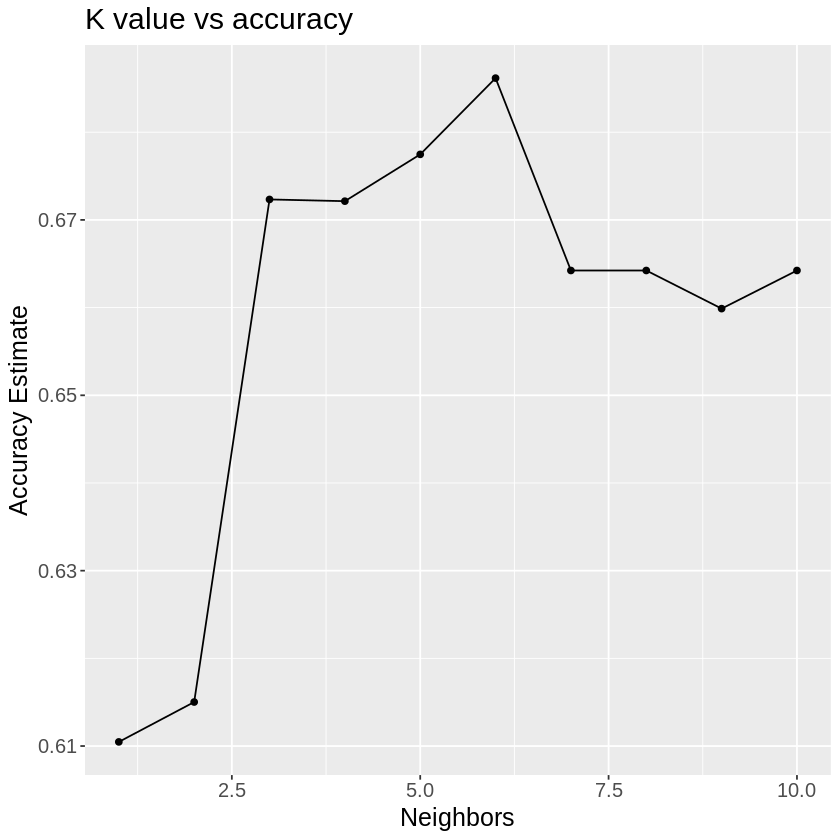

In [37]:
#Creating a scatter plot based on the model build above 
k_plot <- ggplot(k_model, aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "Neighbors", y = "Accuracy Estimate", title = "K value vs accuracy") +
        theme(text = element_text(size = 15))
k_plot

Analyzing the visualization above, we see that the accuracy peaked when k = 6. Thus, both the visualization and data summary done above agrees that a K value of that will provide the best accuracy in our classification model 

**Comparing to a majority classifier**

### *Building the final model*

## **Testing classifier model**

### *Checking for over/underfitting*

### *Accuracy and confusion matrix*

## **Discussion**

The predictive question we have put forward is: Can heart disease be accurately predicted based on a patient’s maximum heart rate during strenuous exercise and ST depression induced by exercise? In this study, we addressed this question by constructing a classifier based on these two predictors: maximum heart rate during strenuous exercise, and ST depression induced by exercise

**Expected Findings & Outcome**

We expect to achieve a classifier accuracy of over 80% due to the critical nature of the problem context where erroneous predictions could significantly impact a patient's health. Our aim also stems from the recognition of the strong correlation observed during the exploratory phase between the predictors, suggesting the potential for high model accuracy. Furthermore, our report seeks to prove the hypothesis: a positive diagnosis correlates with lower ST depression values and higher maximum heart rates. As mentioned in the introduction part, reduced maximum heart rate indicates lower cardiovascular fitness and ST depression on an electrocardiogram signals potential issues like myocardial ischemia.

## **Reference**

1. *Heart attack*. (2021, September 26). Kaggle. https://www.kaggle.com/datasets/pritsheta/heart-attack
2. Kligfield, P., Ameisen, O., & Okin, P. M. (1989). Heart rate adjustment of ST segment depression for improved detection of coronary artery disease. Circulation, 79(2), 245–255. https://doi.org/10.1161/01.cir.79.2.245
3. Kostis, J. B., Moreyra, A. E., Amendo, M. T., Di Pietro, J., Cosgrove, N. M., & Kuo, P. T. (1982). The effect of age on heart rate in subjects free of heart disease. Studies by ambulatory electrocardiography and maximal exercise stress test. Circulation, 65(1), 141–145. https://doi.org/10.1161/01.cir.65.1.141
4. Analysis of coronary heart disease and prediction of heart attack in coal mining regions using data mining techniques. (2010c, August 1). IEEE Conference Publication | IEEE Xplore. https://ieeexplore.ieee.org/abstract/document/5593711